In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import mercury as mr
from tabulate import tabulate

In [2]:
app = mr.App(title="Gói 1",
        description="Làm bài đi",
        show_code=False,
        show_prompt=False,
        continuous_update=True,
        static_notebook=False,
        show_sidebar=True,
        full_screen=True,
        allow_download=True,
        stop_on_error=False
)

mercury.App

In [3]:
df2018= pd.read_excel('2018-Vietnam.xlsx')
df2019= pd.read_excel('2019-Vietnam.xlsx')
df2020= pd.read_excel('2020-Vietnam.xlsx')
df2021= pd.read_excel('2021-Vietnam.xlsx')
df2022= pd.read_excel('2022-Vietnam.xlsx')

In [4]:
df2018_copy = df2018.copy()
df2019_copy = df2019.copy()
df2020_copy = df2020.copy()
df2021_copy = df2021.copy()
df2022_copy = df2022.copy()

In [5]:
#Tỷ số thanh khoản
def tinh_ty_so_thanh_toan_hien_hanh(CA, TA):
    CR = CA / TA
    return CR
def tinh_ty_so_thanh_toan_nhanh(CA,In,TA):
    QR = (CA - In) / TA
    return QR
#Tỷ số quản lý tài sản
def vong_quay_hang_ton_kho(Sales,In):
    In_TO =  Sales / In
    return In_TO
def ky_thu_tien_binh_quan(AR,Sales):
    DSO = AR / (Sales/365)
    return DSO
def vong_quay_TSCD(Sales,Net_fixed_assets):
    FA_turnover = Sales / Net_fixed_assets
    return FA_turnover
def vong_quay_TTS(Sales,TA):
    TA_turnover = Sales / TA
    return TA_turnover
#Tỷ số quản lý nợ
def ty_so_no_vay(Total_debt,TA):
    Debt_ratio = Total_debt / TA
    return Debt_ratio
def he_so_chi_tra_lai(EBIT,IE):
    TIE = EBIT / IE
    return TIE
def he_so_kha_nang_tra_no(EBITDA,tttienthue,laivay,no_goc):
	EBITDA_coverage= (EBITDA + tttienthue) / (laivay+tttienthue+no_goc)
	return EBITDA_coverage
#Tỷ số sinh lợi
def ty_le_lai_gop(Gross_profit,Sales):
    Gross_profit_margin = Gross_profit / Sales
    return Gross_profit_margin
def ty_le_lai_rong(Net_income,Sales):
    Net_profit_margin = Net_income / Sales
    return Net_profit_margin
def ty_le_loi_nhuan_hoat_dong(EBIT,Sales):
    Operating_margin = EBIT / Sales
    return Operating_margin
def ROA(Net_income,TA):
    ROA = Net_income / TA
    return ROA
def ROE(Net_income,CE):
    ROE = Net_income / CE
    return ROE
def ROIC(EBIT,T,Debt,Equity):
    ROIC = (EBIT*(1-T)) / (Debt+Equity)
    return ROIC
def BEP(EBIT,TA):
    BEP = EBIT / TA
    return BEP
def he_so_nhan(TA,Equity):
    EM = TA / Equity
    return EM
def DUPONT_EQUATION(Net_profit_margin,TA_turnover,EM):
    ROEE = Net_profit_margin * TA_turnover * EM
    return ROEE


In [6]:
dfinfo= pd.read_excel('Price-Vol VN 2015-2023.xlsx', sheet_name="Info")
dfprice= pd.read_excel('Price-Vol VN 2015-2023.xlsx', sheet_name="Price")
dfvolume= pd.read_excel('Price-Vol VN 2015-2023.xlsx', sheet_name="Volume")

In [7]:
dfinfo_copy = dfinfo.copy()
dfprice_copy = dfprice.copy()
dfvolume_copy = dfvolume.copy()
dfinfo_copy =dfinfo_copy.rename(columns ={'Symbol': "Code"})
dfb=[dfinfo_copy,dfprice_copy,dfvolume_copy]

In [8]:
for df in dfb:
    df['Code'] = df['Code'].str.replace('VT:', '')
    df['Code'] = df['Code'].str.replace('(VO)', '')
    df['Code'] = df['Code'].str.replace('(P)', '')
    df.sort_values('Code', inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.columns = df.columns.astype(str)  # Chuyển đổi tên cột thành kiểu dữ liệu chuỗi
    df.drop(df.columns[2], axis=1, inplace=True)
df1 = dfb[1]  # Lấy phần tử thứ hai của danh sách dfb
df2 = dfb[2]  # Lấy phần tử thứ ba của danh sách dfb
df3=dfb[0]
#df3: infp
#df2: volume
#df1:price

In [9]:
df1 =df1.rename(columns ={'Code': "Date"})
df1= df1.drop("Name", axis=1)
df1 = df1.transpose()
new_header = df1.iloc[0]
df1 = df1[1:]
df1.columns = new_header
df1 = df1.reset_index()
df1 = df1.rename(columns={'index': 'Date'})
df1= df1.sort_values(by='Date', ascending=True)
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%Y/%m/%d')
#print('------------------------')
df2 =df2.rename(columns ={'Code': "Date"})
df2= df2.drop("Name", axis=1)
df2 = df2.transpose()
new_header = df2.iloc[0]
df2 = df2[1:]
df2.columns = new_header
df2 = df2.reset_index()
df2= df2.rename(columns={'index': 'Date'})
df2= df2.sort_values(by='Date', ascending=True)
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%Y/%m/%d')

In [10]:
in4_column = df3[['Code', 'Start Date']].copy()
in4_column['Start Date'] = pd.to_datetime(in4_column['Start Date']).dt.strftime('%Y/%m/%d')

In [11]:
dfa = [df2018_copy, df2019_copy, df2020_copy, df2021_copy, df2022_copy]
for df in dfa:
    df.drop(df.index[:7], inplace=True)
    df.columns = df.iloc[0]
    df.drop(df.index[0], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename_axis("Số index", axis=1, inplace=True)
    df.sort_index(axis=0, inplace=True)

for df in dfa:
     df.drop(df.columns[[4, 5, 6,8,9,10]], axis=1, inplace=True)

for df in dfa:
    columns = df.columns
    columns = [col.replace('\nHợp nhất\nQuý: Hàng năm\nNăm:', '') for col in columns]
    df.columns = columns

for df in dfa:
    columns = df.columns
    columns = [col.replace('\nĐơn vị: Triệu VND', '') for col in columns]
    df.columns = columns

df = dfa[0]
for i in range(1, len(dfa)):
    df = pd.merge(df, dfa[i], on=['Mã', 'STT', 'Sàn', 'Tên công ty', 'Ngành ICB - cấp 4'])

df.sort_values('Mã', inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns = df.columns.astype(str)  # Chuyển đổi tên cột thành kiểu dữ liệu chuỗi
df.rename(columns={'STT': 'STT1'}, inplace=True)



In [12]:
#print(df2018_copy.columns)

In [13]:
ticker_textbox=mr.Text(value="HPG",
               label="Nhập mã cổ phiếu")

mercury.Text

In [14]:
symbol_to_lookup = ticker_textbox.value.upper()

In [15]:
symbol_to_lookup = ticker_textbox.value.upper()

# Tìm kiếm dữ liệu dựa trên mã symbol
result = df3[df3["Code"] == symbol_to_lookup]
result1=df2018_copy[df2018_copy['Mã']==symbol_to_lookup]
# Lấy giá trị ngành từ kết quả tìm kiếm
industry = result1["Ngành ICB - cấp 4"].values[0]

# Tìm các mã có cùng ngành
selected_companies = df2018_copy[df2018_copy['Ngành ICB - cấp 4'] == industry]['Mã'].values
# Xuất tên công ty và ngành công nghiệp
company_name = result["Name"].values[0]
industry = result["Sector"].values[0]
start_date=result['Start Date'].values[0]
exchange=result1['Sàn'].values[0]
ma_nganh=result1['Ngành ICB - cấp 4'].values[0]
# print(f"Tên công ty: {company_name}")
# print(f"Ngành công nghiệp: {industry}")
# print(f"Ngày niêm yết: {start_date}")
# print(f"Mã sàn: {exchange}")
# print(f"Thuộc ngành: {ma_nganh}")
# print("Các mã có cùng ngành:")
# df_selected_companies = pd.DataFrame(data=selected_companies, columns=["Các mã có cùng ngành"])
# table = tabulate(df_selected_companies, headers='keys', tablefmt='psql')
# print(table)

In [16]:
from bloxs import B

# display boxes
B([
    B(data=f'<div style="background-color: blue; color: white; width: 200px; height: 200px; text-align: center; font-size: 30px;">{company_name}</div>', title="<strong>Tên doanh nghiệp</strong>"),
    B(data=f'<div style="background-color: green; color: black; width: 200px; height: 200px; text-align: center; font-size: 30px;">{industry}</div>', title="<strong>Ngành công nghiệp</strong>"),
    B(data=f'<div style="background-color: yellow; color: black; width: 200px; height: 200px; text-align: center; font-size: 30px;">{ma_nganh}</div>', title="<strong>Thuộc nhóm ngành</strong>"),
    B(data=f'<div style="background-color: red; color: white; width: 200px; height: 200px; text-align: center; font-size: 30px;">{exchange}</div>', title="<strong>Mã sàn</strong>"),
    B(data=f'<div style="background-color: orange; color: black; width: 200px; height: 200px; text-align: center; font-size: 30px;">{start_date}</div>', title="<strong>Ngày niêm yết</strong>"),
])

In [17]:


print("Danh sách các mã có cùng ngành:")
df_selected_companies = pd.DataFrame(data=selected_companies, columns=["Các mã có cùng ngành"])
num_rows = len(df_selected_companies)

if num_rows <= 30:
    # In bảng đơn
    table = tabulate(df_selected_companies, headers='keys', tablefmt='psql')
    print(table)
else:
    # Tách danh sách thành các phần
    num_parts = (num_rows // 30) + 1
    for i in range(num_parts):
        start_idx = i * 30
        end_idx = min((i + 1) * 30, num_rows)
        df_part = df_selected_companies.iloc[start_idx:end_idx]

        # Đánh dấu số tiếp theo
        if i == num_parts - 1:
            title = f"Bảng {i+1} (Từ {start_idx+1} đến {end_idx}, Tổng số {end_idx})"
        else:
            title = f"Bảng {i+1} (Từ {start_idx+1} đến {end_idx}, Tổng số 30)"
        print(title)
        table = tabulate(df_part, headers='keys', tablefmt='psql')
        print(table)
        print()
        
    

Danh sách các mã có cùng ngành:
Bảng 1 (Từ 1 đến 30, Tổng số 30)
+----+------------------------+
|    | Các mã có cùng ngành   |
|----+------------------------|
|  0 | HPG                    |
|  1 | DTL                    |
|  2 | HMC                    |
|  3 | HSG                    |
|  4 | NKG                    |
|  5 | POM                    |
|  6 | SHA                    |
|  7 | SHI                    |
|  8 | SMC                    |
|  9 | TLH                    |
| 10 | TNA                    |
| 11 | TNI                    |
| 12 | VCA                    |
| 13 | ITQ                    |
| 14 | KKC                    |
| 15 | KMT                    |
| 16 | MEL                    |
| 17 | MHL                    |
| 18 | SSM                    |
| 19 | TKG                    |
| 20 | VGS                    |
| 21 | BCA                    |
| 22 | BVG                    |
| 23 | CBI                    |
| 24 | DFC                    |
| 25 | DPS                    |
| 26 | 

Historic stock price 📈


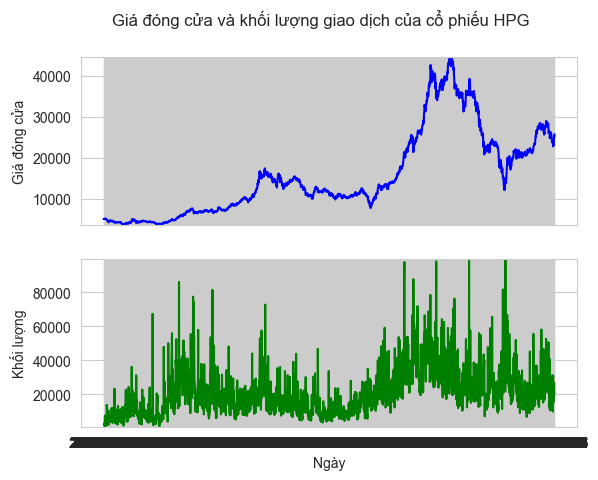

In [18]:
print('Historic stock price 📈')
import matplotlib.pyplot as plt
filtered_df = in4_column.loc[in4_column['Code'] == symbol_to_lookup]
if not filtered_df.empty:
    # Truy cập cột 'Start Date' của DataFrame lọc
    start_date = filtered_df['Start Date'].values[0]

    # Lọc các hàng từ 'start date' trở về sau trong DataFrame 'df'
    filtered_date_df = df1.loc[df1['Date'] >= start_date]

    # Kiểm tra nếu DataFrame lọc không rỗng
    if not filtered_date_df.empty:
        # Kiểm tra tên cột 'a' có tồn tại trong DataFrame lọc hay không
        if symbol_to_lookup in filtered_date_df.columns:
            # Truy cập cột 'a' của DataFrame lọc
            close_price = filtered_date_df[symbol_to_lookup]

            # Tạo DataFrame mới từ cột 'Start Date' và 'a'
            merged_df = pd.DataFrame({'Start Date': filtered_date_df['Date'], symbol_to_lookup: close_price})

            # Lọc các ngày có khối lượng giao dịch
            filtered_volume_df = df2.loc[df2[symbol_to_lookup] > 0]

            close_price = filtered_date_df[symbol_to_lookup]

            # Tạo DataFrame mới từ cột 'Start Date' và 'a'
            merged_df = pd.DataFrame({'Start Date': filtered_date_df['Date'], symbol_to_lookup: close_price})
    
            # Lọc các ngày có khối lượng giao dịch
            filtered_volume_df = df2.loc[df2[symbol_to_lookup] > 0]
    
           # Tạo subplot cho biểu đồ giá đóng cửa và hộp khối lượng giao dịch
            fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
            
            # Vẽ biểu đồ giá đóng cửa
            axes[0].plot(merged_df['Start Date'], merged_df[symbol_to_lookup], label='Giá đóng cửa', color='blue')
            axes[0].set_ylabel('Giá đóng cửa')
            axes[0].set_ylim(merged_df[symbol_to_lookup].min(), merged_df[symbol_to_lookup].max())
            
            # Vẽ biểu đồ hộp khối lượng giao dịch
            axes[1].plot(filtered_volume_df['Date'], filtered_volume_df[symbol_to_lookup], label='Khối lượng', color='green')
            axes[1].set_xlabel('Ngày')
            axes[1].set_ylabel('Khối lượng')
            axes[1].set_ylim(filtered_volume_df[symbol_to_lookup].min(), filtered_volume_df[symbol_to_lookup].max())
            
            # Thiết lập tiêu đề cho toàn bộ biểu đồ
            plt.suptitle(f"Giá đóng cửa và khối lượng giao dịch của cổ phiếu {symbol_to_lookup}")
            
            # Tạo layout full màn hình
            mng = plt.get_current_fig_manager()
            mng.full_screen_toggle()
            
            # Hiển thị biểu đồ
            plt.show()

        else:
            print(f"Không tìm thấy cột '{symbol_to_lookup}' trong DataFrame lọc.")
    else:
        print(f"Không tìm thấy dữ liệu từ '{start_date}' trở đi trong DataFrame 'df'.")
else:
    print(f"Không tìm thấy mã '{symbol_to_lookup}' trong DataFrame 'in4_column'.")

In [19]:
#df2018_copy.head(10)

In [20]:
# columns_list = df2018_copy.columns
# print(columns_list)

In [21]:
# Chọn checkbox
hienkq = mr.Checkbox(value=True, label="Hiện kết quả đã chọn")

mercury.Checkbox

In [39]:
cac_bao_cao = ['CĐKT', 'KQKD', 'LCTT', 'TM BCTT', 'BCTCKH']
select_variable1 = mr.MultiSelect(
    label='Chọn các báo cáo',
    choices=cac_bao_cao
)
years=['2018','2019','2020','2021','2022']

import re

if hienkq.value:
    if 'CĐKT' in select_variable1.value:
        print(f'Bảng cân đối kế toán của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            cdkt_columns = df_filtered.filter(regex=r'^CĐKT', axis=1)
            df_melted = cdkt_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)

        # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)

if hienkq.value:
    if 'KQKD' in select_variable1.value:
        print(f'Bảng báo cáo kết quả kinh doanh của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            kqkd_columns = df_filtered.filter(regex=r'^KQKD', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = kqkd_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            # Sắp xếp lại DataFrame theo thứ tự tên cột nằm theo hàng dọc
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)
           # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)

if hienkq.value:
    if 'LCTT' in select_variable1.value:
        print(f'Bảng lưu chuyển tiền tệ của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            lctt_columns = df_filtered.filter(regex=r'^LCTT', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = lctt_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)

        # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)
            
if hienkq.value:
    if 'TM BCTT' in select_variable1.value:
        print(f'Bảng thuyết minh báo cáo tiền tệ của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            tm_columns = df_filtered.filter(regex=r'^TM', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = tm_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)

        # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)
            
if hienkq.value:
    if 'BCTCKH' in select_variable1.value:
        print(f'Bảng báo cáo tài chính kế hoạch của mã {symbol_to_lookup}')
        selected_years = years
        df_concat = pd.DataFrame()
        for year in selected_years:
            df_filtered = globals()[f'df{year}_copy'].loc[globals()[f'df{year}_copy']['Mã'] == symbol_to_lookup]
            # Lọc các cột có tên bắt đầu bằng "CĐKT"
            bctckh_columns = df_filtered.filter(regex=r'^BCTCKH', axis=1)
            
            # Sử dụng phương thức melt để biến đổi DataFrame
            df_melted = bctckh_columns.reset_index().melt(id_vars=['index'], var_name='Cột', value_name='Giá trị')
            
            df_concat = pd.concat([df_concat, df_melted['Giá trị']], axis=1)
            df_melted['Tên gọi'] = df_melted['Cột'] # Add the column with the names
            df_melted['Tên gọi'] = df_melted['Cột'].apply(lambda x: re.sub(r'2022', '', x).strip())
        df_concat.columns = selected_years
        df_concat = pd.concat([ df_melted['Tên gọi'],df_concat], axis=1)

        # In ra bảng đã sắp xếp
        from tabulate import tabulate

        # Chuyển đổi DataFrame thành danh sách các hàng
        table_data = df_concat.values.tolist()

        # Lấy danh sách tên cột
        headers = df_concat.columns.tolist()

        # Đóng khung bảng và in ra
        table = tabulate(table_data, headers, tablefmt='fancy_grid')
        print(table)

mercury.MultiSelect

In [23]:
ti_so = ['Liquity', 'Assets', 'Management']


Các chỉ số tài chính


mercury.MultiSelect

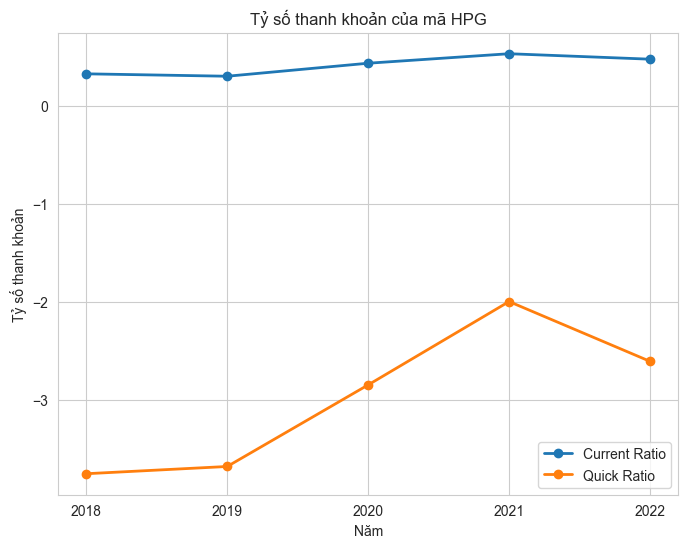

In [24]:
import matplotlib.pyplot as plt

print('Các chỉ số tài chính')
select_variable = mr.MultiSelect(label='Chọn các tỉ số', choices=['Liquity', 'Assets', 'Management'], value=ti_so)

if hienkq.value:
    if 'Liquity' in select_variable.value:
        b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]

        start_year = 2018
        end_year = 2022

        selected_years = range(start_year, end_year + 1)
        current_ratios = []
        quick_ratios = []

        for year in selected_years:
            try:
                current_ratio = tinh_ty_so_thanh_toan_hien_hanh(df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0])
                quick_ratio = tinh_ty_so_thanh_toan_nhanh(df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0])

                current_ratios.append(current_ratio)
                quick_ratios.append(quick_ratio)

            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")

        # Customize the plot
        plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
        plt.plot(selected_years, current_ratios, marker='o', label='Current Ratio', linewidth=2)
        plt.plot(selected_years, quick_ratios, marker='o', label='Quick Ratio', linewidth=2)
        plt.xlabel('Năm')
        plt.ylabel('Tỷ số thanh khoản')
        plt.title(f'Tỷ số thanh khoản của mã {b}')
        plt.xticks(range(start_year, end_year + 1))
        plt.legend()
        plt.grid(True)  # Add grid lines for better readability
        plt.show()
    else:
        print('')
else:
    print('')

In [25]:
years = ['2018', '2019', '2020', '2021', '2022']
selected_companies = df2018_copy[df2018_copy['Ngành ICB - cấp 4'] == industry]['Mã'].values

def tinh_trung_binh_nganh(selected_companies, years):
    total_current_ratio = 0
    total_quick_ratio = 0
    count = 0

    for symbol_to_lookup in selected_companies:
        b = symbol_to_lookup

        for year in years:
            try:
                current_asset = df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0]
                total_asset = df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0]
                inventory = df.loc[df['Mã'] == b, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0]

                current_ratio = tinh_ty_so_thanh_toan_hien_hanh(current_asset, total_asset)
                quick_ratio = tinh_ty_so_thanh_toan_nhanh(current_asset, inventory, total_asset)

                total_current_ratio += current_ratio
                total_quick_ratio += quick_ratio
                count += 1

            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")

    if count > 0:
        avg_current_ratio = total_current_ratio / count
        avg_quick_ratio = total_quick_ratio / count
        return avg_current_ratio, avg_quick_ratio
    else:
        return 0, 0

avg_current_ratio, avg_quick_ratio = tinh_trung_binh_nganh(selected_companies, years)
print("Trung bình tỷ số thanh toán hiện hành:", avg_current_ratio)
print("Trung bình tỷ số thanh toán nhanh:", avg_quick_ratio)

Trung bình tỷ số thanh toán hiện hành: 0
Trung bình tỷ số thanh toán nhanh: 0


In [26]:
def tinh_trung_binh_nganh(selected_companies, selected_years):
    total_current_ratio = 0
    total_quick_ratio = 0
    count = 0

    for symbol_to_lookup in selected_companies:
        b = symbol_to_lookup

        for year in selected_years:
            try:
                current_asset = df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0]
                total_asset = df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0]
                inventory = df.loc[df['Mã'] == b, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0]

                current_ratio = tinh_ty_so_thanh_toan_hien_hanh(current_asset, total_asset)
                quick_ratio = tinh_ty_so_thanh_toan_nhanh(current_asset, inventory, total_asset)

                total_current_ratio += current_ratio
                total_quick_ratio += quick_ratio
                count += 1

            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")

    if count > 0:
        avg_current_ratio = total_current_ratio / count
        avg_quick_ratio = total_quick_ratio / count
        return avg_current_ratio, avg_quick_ratio
    else:
        return 0, 0

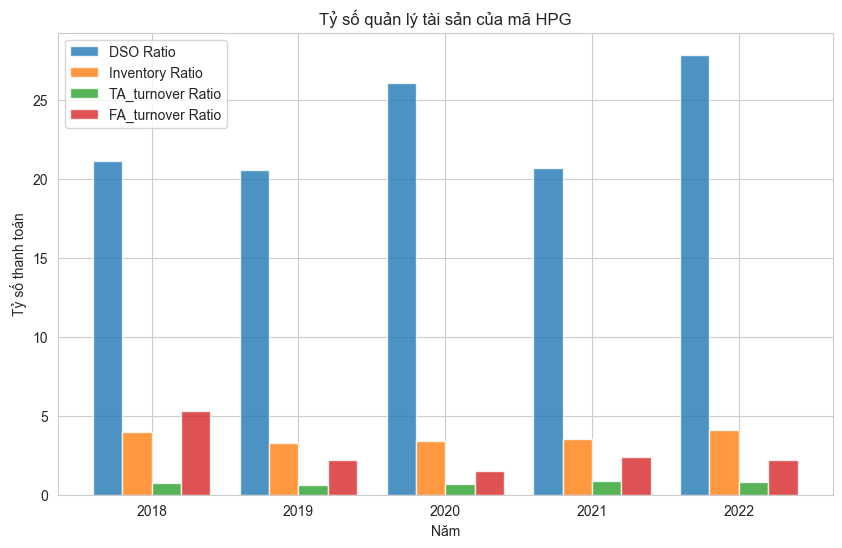

In [27]:


if hienkq.value:
    if 'Assets' in select_variable.value:
        b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]
    
        start_year = 2018
        end_year = 2022
    
        selected_years = range(start_year, end_year + 1)
        inventory_ratios = []
        DSO_ratios = []
        FA_turnover_ratios = []
        TA_turnover_ratios = []
    
        for year in selected_years:
            try:
                AR = df.loc[df['Mã'] == b, f'CĐKT. Các khoản phải thu ngắn hạn {year}'].values[0] + df.loc[df['Mã'] == b, f'CĐKT. Phải thu dài hạn {year}'].values[0]
                
                inventory_ratio = vong_quay_hang_ton_kho(df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0],df.loc[df['Mã'] == b, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0]) 
                DSO_ratio = ky_thu_tien_binh_quan(AR, df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0])
    
                inventory_ratios.append(inventory_ratio)
                DSO_ratios.append(DSO_ratio)
                
                FA_turnover_ratio = vong_quay_TTS(df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0], (df.loc[df['Mã'] == b, f'CĐKT. Tài sản cố định {year}'].values[0] - df.loc[df['Mã'] == b, f'LCTT. Khấu hao TSCĐ   {year}'].values[0]))
                TA_turnover_ratio = vong_quay_TTS(df.loc[df['Mã'] == b, f'KQKD. Doanh thu thuần {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0])
            
                FA_turnover_ratios.append(FA_turnover_ratio)
                TA_turnover_ratios.append(TA_turnover_ratio)
                
            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")
    
        # Customize the plot
        plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
        bar_width = 0.2  # Adjust the width of the bars
        opacity = 0.8  # Adjust the opacity of the bars
        
        # Create index for the bars
        index = np.arange(len(selected_years))
        
        # Plotting the grouped bar chart
        plt.bar(index, DSO_ratios, bar_width, alpha=opacity, label='DSO Ratio')
        plt.bar(index + bar_width, inventory_ratios, bar_width, alpha=opacity, label='Inventory Ratio')
        plt.bar(index + 2 * bar_width, TA_turnover_ratios, bar_width, alpha=opacity, label='TA_turnover Ratio')
        plt.bar(index + 3 * bar_width, FA_turnover_ratios, bar_width, alpha=opacity, label='FA_turnover Ratio')
        
        plt.xlabel('Năm')
        plt.ylabel('Tỷ số thanh toán')
        plt.title(f'Tỷ số quản lý tài sản của mã {b}')
        plt.xticks(index + 1.5 * bar_width, selected_years)
        plt.legend()
        plt.grid(True)  # Add grid lines for better readability
        plt.show()
    else: 
        print('')

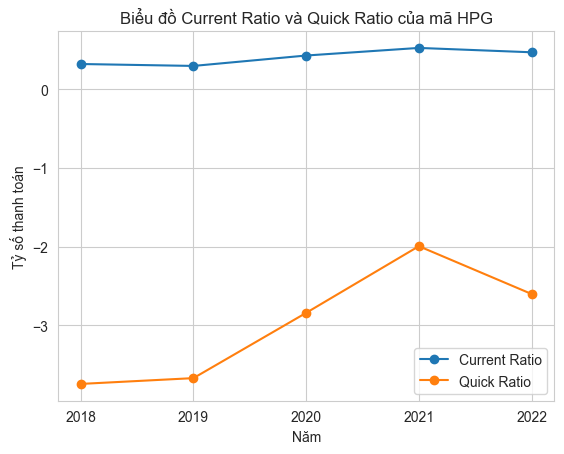

In [28]:
 if hienkq.value:
    if 'Management' in select_variable.value:
        b = df.loc[df['Mã'] == symbol_to_lookup, 'Mã'].values[0]
    
        start_year = 2018
        end_year = 2022
    
        selected_years = range(start_year, end_year + 1)
        current_ratios = []
        quick_ratios = []
    
        for year in selected_years:
            try:
                current_ratio = tinh_ty_so_thanh_toan_hien_hanh(df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0])
                quick_ratio = tinh_ty_so_thanh_toan_nhanh(df.loc[df['Mã'] == b, f'CĐKT. TÀI SẢN NGẮN HẠN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. TỔNG CỘNG TÀI SẢN {year}'].values[0], df.loc[df['Mã'] == b, f'CĐKT. Hàng tồn kho, ròng {year}'].values[0])
    
                current_ratios.append(current_ratio)
                quick_ratios.append(quick_ratio)

    
            except IndexError:
                print(f"Giá trị {b} không tồn tại trong cột 'Mã'.")
    
        plt.plot(selected_years, current_ratios, marker='o', label='Current Ratio')
        plt.plot(selected_years, quick_ratios, marker='o', label='Quick Ratio')
        plt.xlabel('Năm')
        plt.ylabel('Tỷ số thanh toán')
        plt.title(f'Biểu đồ Current Ratio và Quick Ratio của mã {b}')
        plt.xticks(range(start_year, end_year + 1))
        plt.legend()
        plt.show()
 else:
    print("")